In [26]:
import skgstat as skg
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr('/Net//Groups/BGI/scratch/bkraft/drought_data/cube.zarr/')

In [126]:
fvc = ds.fvc_ano.isel(time=1000).load()

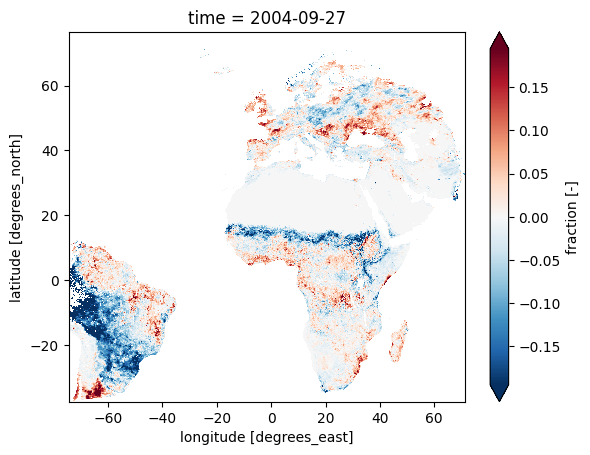

In [114]:
fvc.plot(robust=True)

In [115]:
#fvc['lat_grid'] = fvc.lat.expand_dims(lon=fvc.lon).T
#fvc['lon_grid'] = fvc.lon.expand_dims(lat=fvc.lat)
fvc_stack = fvc.stack(sample=('lat', 'lon')).compute()
fvc_stack = fvc_stack.where(fvc_stack.notnull() & (fvc_stack != 0), drop=True)

In [116]:
locations = np.stack((fvc_stack.lat, fvc_stack.lon)).T
values = fvc_stack.values

In [117]:
locations.shape

(443570, 2)

In [124]:
varg = skg.Variogram(
    coordinates=locations,
    values=values,
    maxlag=25,
    samples=10000,
    fit_method='lm',
    n_lags=10,
    use_nugget=True)

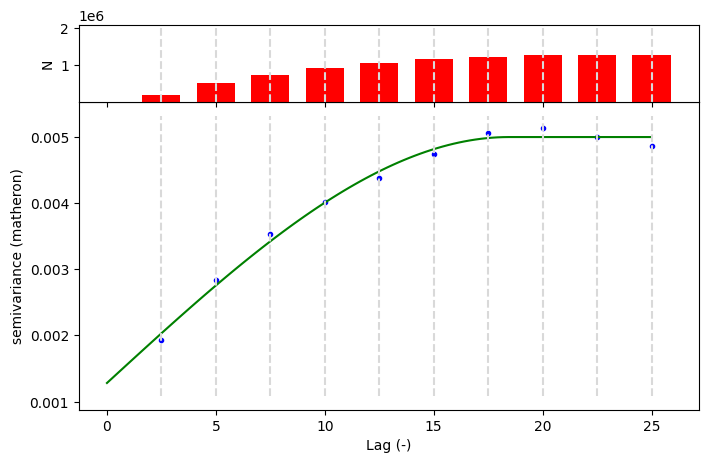

In [125]:
fig = varg.plot()